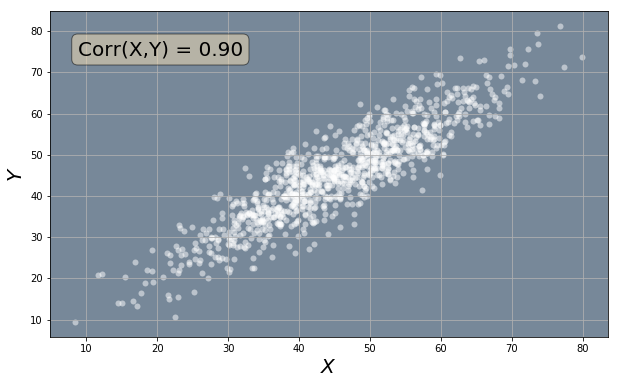

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

import utils

# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]

# Set the data range
data_min = 10
data_max = 80

# Set the amount of correlation. The correlation is a number in the closed interval [0,1].
corr = 0.9

# create correlated data
X_norm = utils.create_corr_data(corr, data_min, data_max)

# Plot the correlated data
utils.plot_data(X_norm, corr)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

print('\nPCA Parameters:', pca, '\n')


PCA Parameters: PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False) 



In [21]:
pca.fit(X_norm)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
print('\nArray Containing all Principal Components:\n', pca.components_)
print('\nFirst Principal Components:\n', pca.components_[0])
print('\nSecond Principal Components:\n', pca.components_[1])
print('\nEigenvalues:\n', pca.singular_values_)
print('\nPercentage of Variance Explained  by Each Principal Component\n', pca.explained_variance_ratio_)


Array Containing all Principal Components:
 [[-0.70469824 -0.70950715]
 [ 0.70950715 -0.70469824]]

First Principal Components:
 [-0.70469824 -0.70950715]

Second Principal Components:
 [ 0.70950715 -0.70469824]

Eigenvalues:
 [495.51482752 114.52408204]

Percentage of Variance Explained  by Each Principal Component
 [0.94929159 0.05070841]


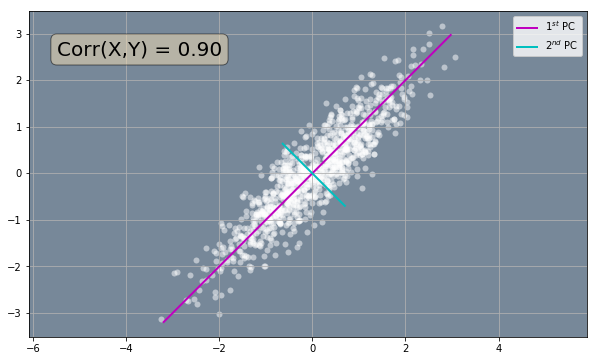

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

import utils

# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]

# Set the data range
data_min = 10
data_max = 80

# Set the amount of correlation. The correlation is a number in the closed interval [0,1].
corr = 0.9

# create correlated data
utils.plot_data_with_pca_comp(corr, data_min, data_max)


# Project Data

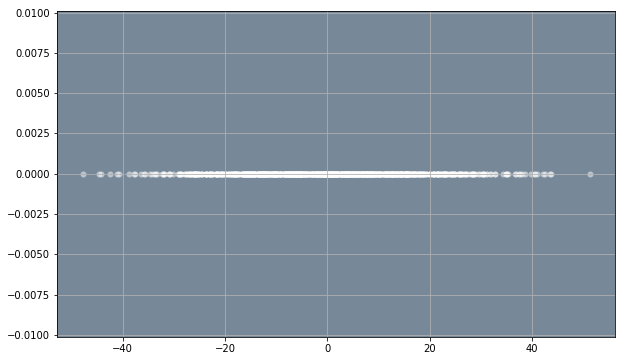

In [24]:
import numpy as np

from sklearn.decomposition import PCA

pca = PCA(n_components = 1)

pca.fit(X_norm)

transformed_data = pca.transform(X_norm)

yvals = np.zeros(1000)

# Plot the data
plt.scatter(transformed_data, yvals, color = 'white', alpha = 0.5, linewidth = 0)
ax = plt.gca()
ax.set_facecolor('lightslategray')
plt.grid()

plt.show()

[source](https://github.com/udacity/artificial-intelligence-for-trading/blob/master/quiz/m4_multifactor_models/PCA%20Toy%20Problem/PCA%20Toy%20Problem.ipynb)